# 第九章　自然エネルギー利用設備 / Chapter 9 Natural energy utilization equipment

## 第二節　液体集熱式太陽熱利用設備 / Section 2 Water based solar system

In [1]:
import numpy as np
import matplotlib.pyplot as plt


# 試算例

In [2]:
def get_default_water_based_solar_system():

    base = {'region' : 6, 'sol_region' : 3, 'A_A' : 120.08, 'L_HWH' : None, 'heating_flag_d' : None}

    HW = {'hw_type' : 'ガス従来型給湯機', 'e_rtd' : 0.704, 'e_dash_rtd' : None, 'hybrid_category' : None,
          'bath_function' : 'ふろ給湯機(追焚あり)', 'has_bath' : True, 'pipe_diameter' : '上記以外',
          'kitchen_watersaving_A' : False, 'kitchen_watersaving_C' : False,  'shower_watersaving_A' : False,
          'shower_watersaving_B' : False, 'washbowl_watersaving_C' : False, 'bath_insulation' : False}

    SHC = {'type' : '液体集熱式', 'A_sp' : 5, 'P_alpha_sp' : 0, 'P_beta_sp' : 30,
           'ls_type' : '太陽熱温水器', 'W_tnk_ss': None}

    return base, HW, SHC

In [3]:
def calc_results(base, HW, SHC):

    from pyhees.section2_1_c import get_n_p
    from pyhees.section2_1_b import get_f_prim
    from pyhees.section7_1 import calc_E_E_W_d_t, calc_E_G_W_d_t, calc_E_K_W_d_t

    L_HWH = base['L_HWH']
    region = base['region']
    sol_region = base['sol_region']
    A_A = base['A_A']
    n_p = get_n_p(A_A)
    heating_flag_d = base['heating_flag_d']

    # 度をラジアンに変換
    if SHC is not None:
        SHC['P_alpha_sp'] = np.radians(SHC['P_alpha_sp']) if SHC['type'] == '液体集熱式' else None
        SHC['P_beta_sp'] = np.radians(SHC['P_beta_sp']) if SHC['type'] == '液体集熱式' else None

    E_E_W_d_t = calc_E_E_W_d_t(n_p, L_HWH, heating_flag_d, region, sol_region, HW, SHC)
    E_G_W_d_t = calc_E_G_W_d_t(n_p, L_HWH, heating_flag_d, A_A, region, sol_region, HW, SHC)
    E_K_W_d_t = calc_E_K_W_d_t(n_p, L_HWH, heating_flag_d, A_A, region, sol_region, HW, SHC)

    f_prim = get_f_prim()
    Ene_TOTAL = E_E_W_d_t * f_prim / 1000 + E_G_W_d_t + E_K_W_d_t

    print('給湯用一次エネルギー消費量 = {}MJ/年'.format(np.sum(Ene_TOTAL)))

    return {'Ene_TOTAL': Ene_TOTAL}



In [4]:
def get_each_graph(_results):

    results_sum_day = np.sum(_results.reshape(365,24), axis = 1)
    results_mean_hour = np.mean(_results.reshape(365,24), axis = 0)

    fig = plt.figure(figsize = (20,12))
    grh1 = fig.add_subplot(311)
    grh1.set_ylabel('MJ/h')
    grh1.set_xlabel('hour')
    grh1.plot(_results)

    grh_day = fig.add_subplot(312)
    grh_day.set_ylabel('MJ/d')
    grh_day.set_xlabel('day')
    grh_day.plot(results_sum_day)

    grh_hour = fig.add_subplot(313)
    grh_hour.plot(results_mean_hour)
    grh_hour.set_ylabel('MJ/h')
    grh_hour.set_xlabel('hour')

    plt.show()


### 計算条件1

初期条件での計算

In [5]:
base, HW, SHC = get_default_water_based_solar_system()
E_W_d_t_1 = calc_results(base, HW, SHC)['Ene_TOTAL']

L_ba = 1339.0568333333335
W_k = 35806.0
W_s = 58690.0
W_w = 9454.0
W_b1 = 0.0
W_b2 = 60300.0
W_ba1 = 0.0
W_dash_k = 35806.0
W_dash_s = 58690.0
W_dash_w = 9454.0
W_dash_b1 = 0.0
W_dash_b2 = 60300.0
W_dash_ba1 = 0.0
L_dash_k = 3622.896051970286
L_dash_s = 5940.34804910638
L_dash_w = 957.2672611235673
L_dash_b1 = 0.0
L_dash_b2 = 6097.813467345601
L_dash_ba1 = 0.0
L_dash_ba2 = 1673.8210416666666
L_dashdash_k = 2317.9921271299077
L_dashdash_s = 3711.3439027835684
L_dashdash_w = 605.3306697063142
L_dashdash_b1 = 0.0
L_dashdash_b2 = 3828.584992349928
L_dashdash_ba1 = 0.0
L_dashdash_ba2 = 1673.8210416666666
E_E_hs_aux1 = 37.22433263888889
E_E_hs_aux2 = 6.513888888888888
E_E_hs_aux3 = 13.686551818865741
給湯用一次エネルギー消費量 = 18612.603401865385MJ/年


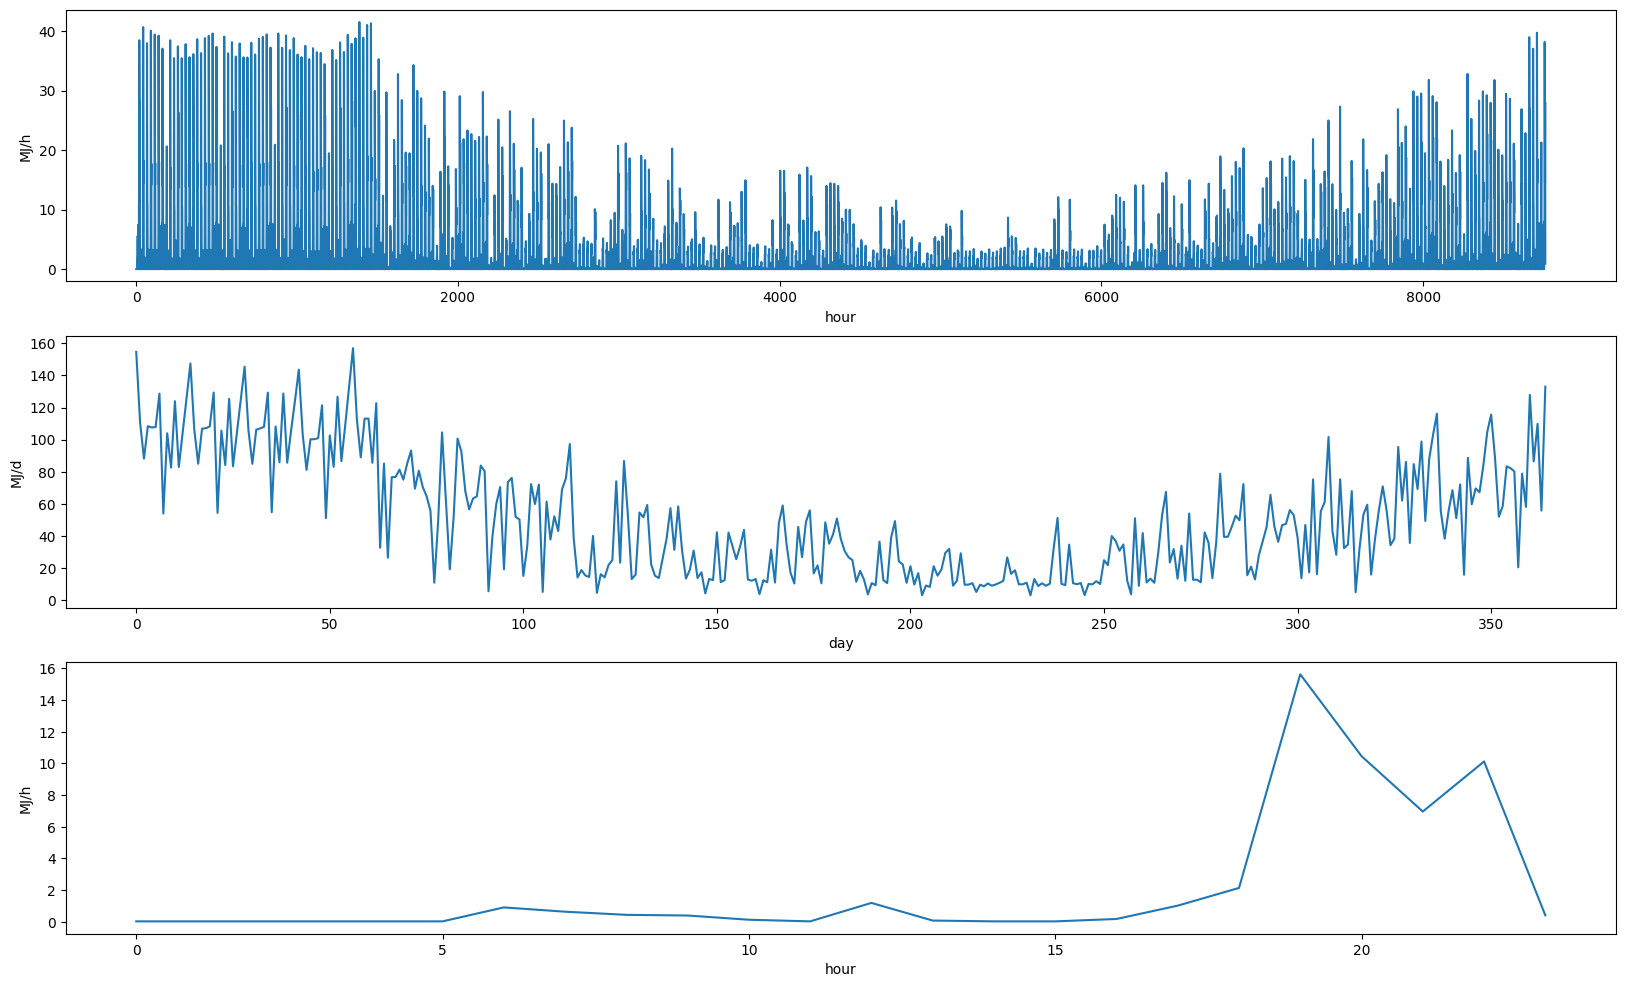

In [6]:
get_each_graph(E_W_d_t_1)

### 計算条件2

- 年間の日射地域区分をA5区分に変更

In [7]:
base, HW, SHC = get_default_water_based_solar_system()
base['sol_region'] = 5
E_W_d_t_2 = calc_results(base, HW, SHC)['Ene_TOTAL']

L_ba = 1339.0568333333335
W_k = 35806.0
W_s = 58690.0
W_w = 9454.0
W_b1 = 0.0
W_b2 = 60300.0
W_ba1 = 0.0
W_dash_k = 35806.0
W_dash_s = 58690.0
W_dash_w = 9454.0
W_dash_b1 = 0.0
W_dash_b2 = 60300.0
W_dash_ba1 = 0.0
L_dash_k = 3622.896051970286
L_dash_s = 5940.34804910638
L_dash_w = 957.2672611235673
L_dash_b1 = 0.0
L_dash_b2 = 6097.813467345601
L_dash_ba1 = 0.0
L_dash_ba2 = 1673.8210416666666
L_dashdash_k = 1820.9010218549408
L_dashdash_s = 2875.0462988794197
L_dashdash_w = 471.37713479825265
L_dashdash_b1 = 0.0
L_dashdash_b2 = 2998.5045388866656
L_dashdash_ba1 = 0.0
L_dashdash_ba2 = 1673.8210416666666
E_E_hs_aux1 = 37.22433263888889
E_E_hs_aux2 = 6.513888888888888
E_E_hs_aux3 = 13.686551818865741
給湯用一次エネルギー消費量 = 15215.526854681668MJ/年


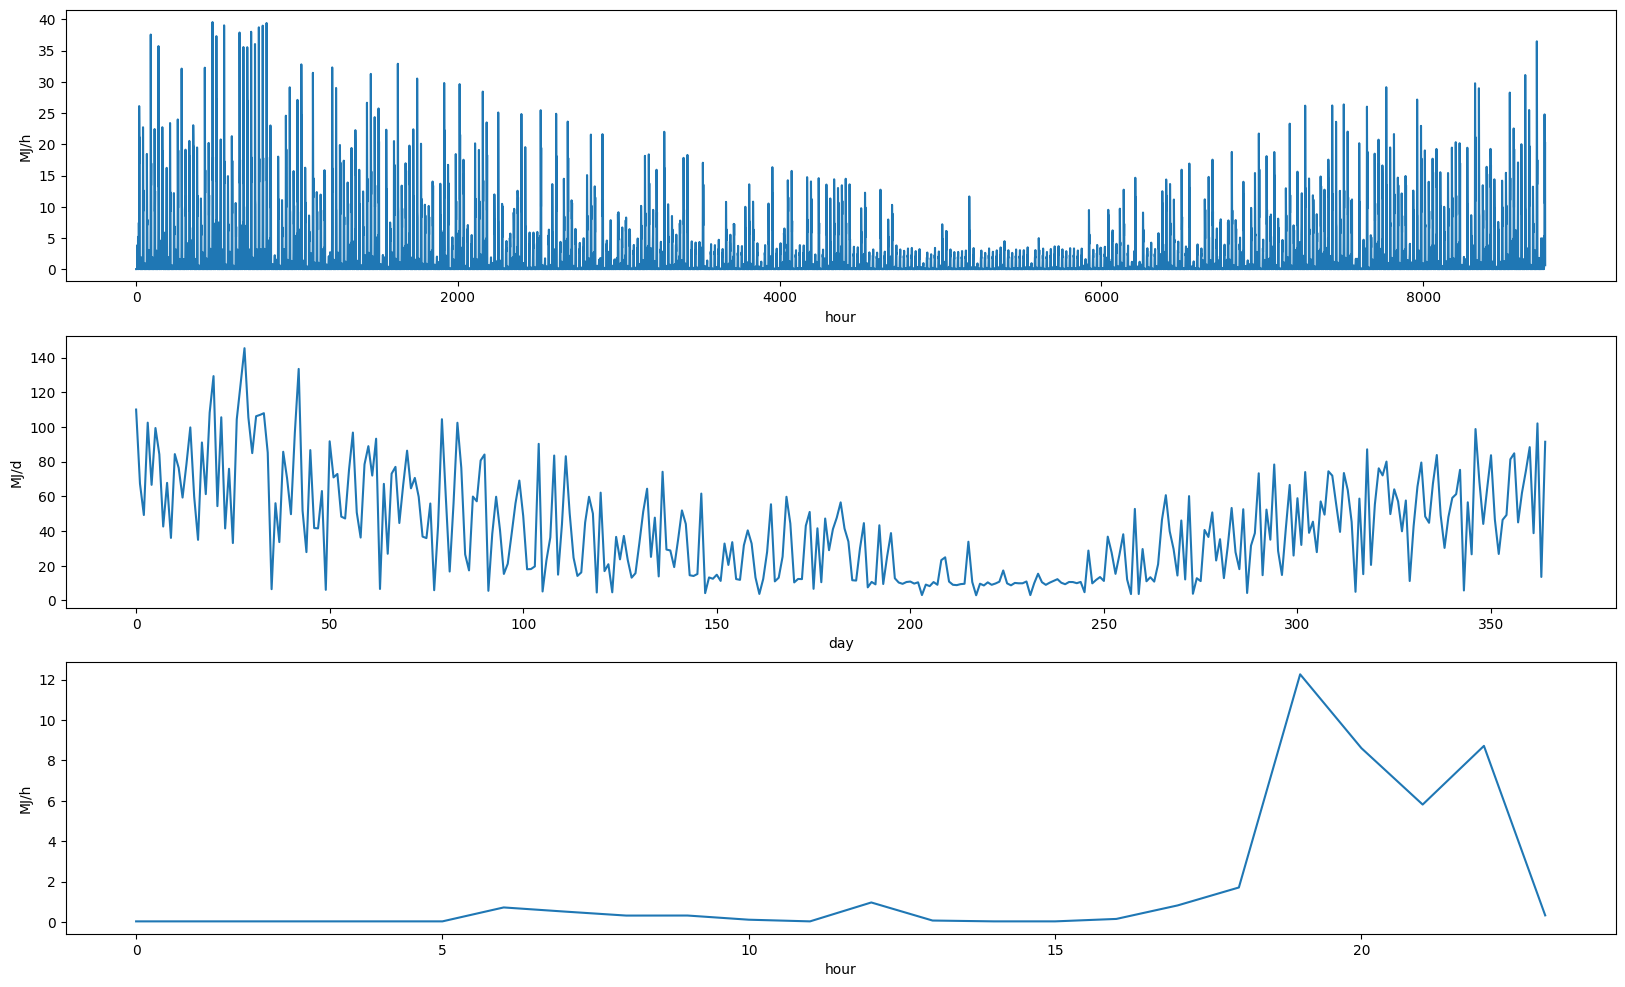

In [8]:
get_each_graph(E_W_d_t_2)

### 計算条件3

- 有効集熱面積を7m2に変更
- 集熱部の設置方位角を90°に変更
- 集熱部の設置傾斜角を50°に変更

In [9]:
base, HW, SHC = get_default_water_based_solar_system()
SHC['A_sp'] = 7
SHC['P_alpha_sp'] = 90
SHC['P_beta_sp'] = 50
E_W_d_t_3 = calc_results(base, HW, SHC)['Ene_TOTAL']

L_ba = 1339.0568333333335
W_k = 35806.0
W_s = 58690.0
W_w = 9454.0
W_b1 = 0.0
W_b2 = 60300.0
W_ba1 = 0.0
W_dash_k = 35806.0
W_dash_s = 58690.0
W_dash_w = 9454.0
W_dash_b1 = 0.0
W_dash_b2 = 60300.0
W_dash_ba1 = 0.0
L_dash_k = 3622.896051970286
L_dash_s = 5940.34804910638
L_dash_w = 957.2672611235673
L_dash_b1 = 0.0
L_dash_b2 = 6097.813467345601
L_dash_ba1 = 0.0
L_dash_ba2 = 1673.8210416666666
L_dashdash_k = 2292.7471707720892
L_dashdash_s = 3675.988516776979
L_dashdash_w = 598.9114114926538
L_dashdash_b1 = 0.0
L_dashdash_b2 = 3795.5296106640762
L_dashdash_ba1 = 0.0
L_dashdash_ba2 = 1673.8210416666666
E_E_hs_aux1 = 37.22433263888889
E_E_hs_aux2 = 6.513888888888888
E_E_hs_aux3 = 13.686551818865741
給湯用一次エネルギー消費量 = 18468.909108129337MJ/年


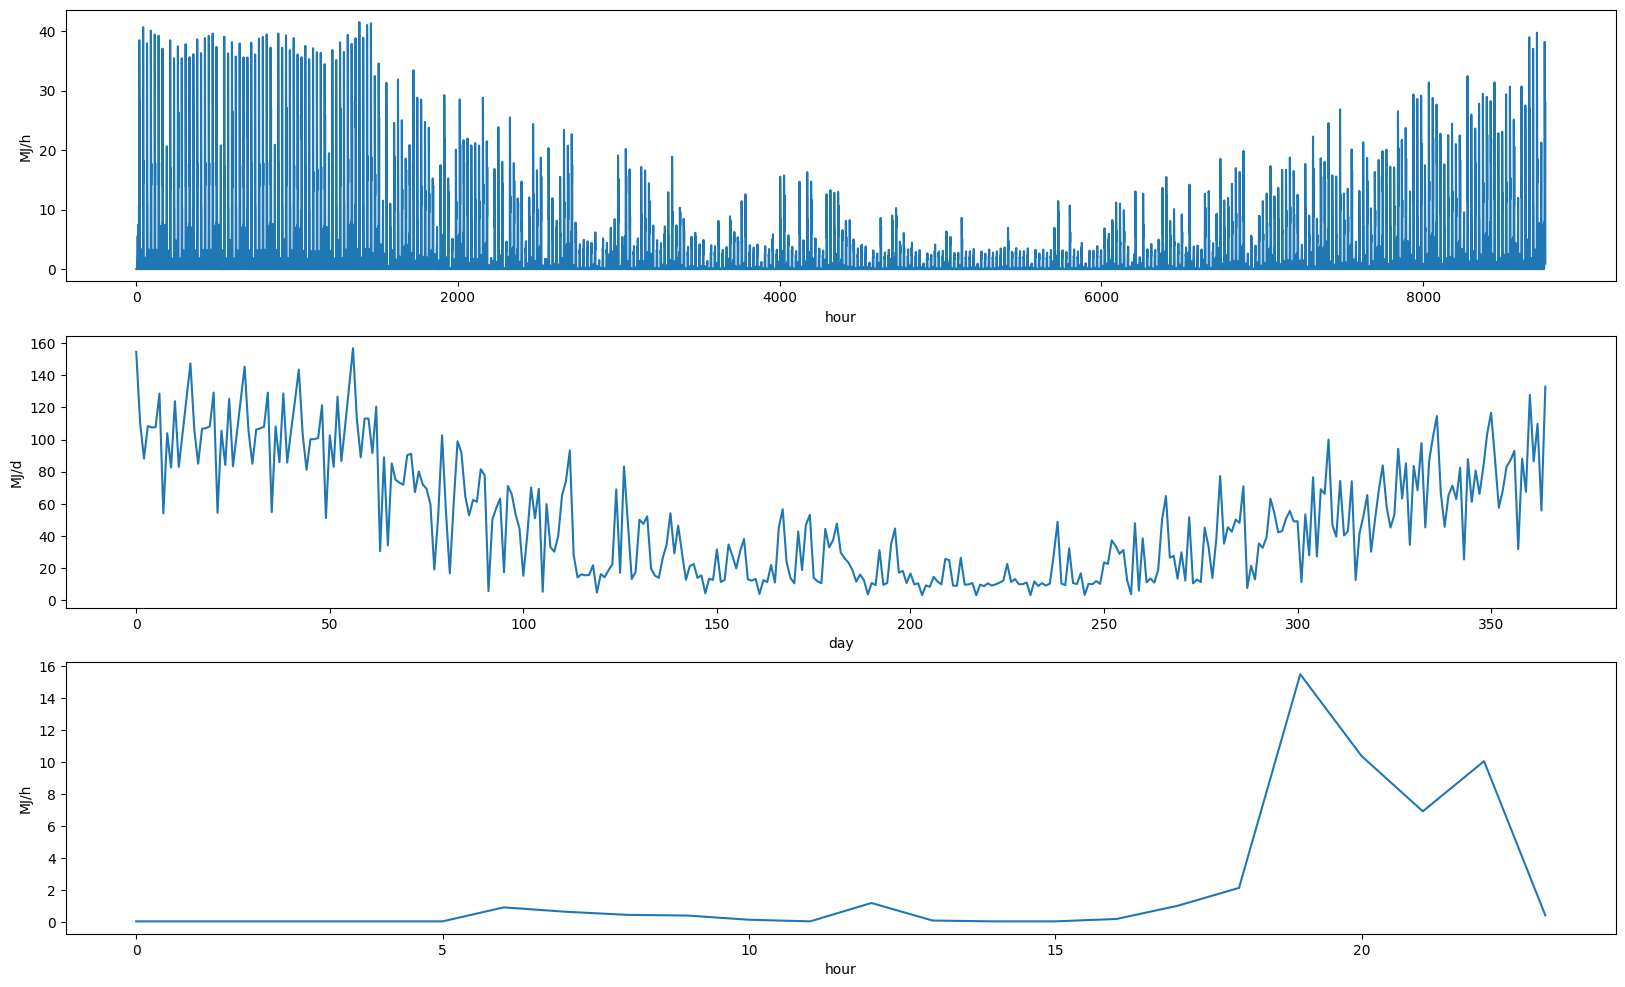

In [10]:
get_each_graph(E_W_d_t_3)

### 計算条件4

- ソーラーシステムに変更
- タンク容量100L

In [11]:
base, HW, SHC = get_default_water_based_solar_system()
SHC['ls_type'] = 'ソーラーシステム'
SHC['W_tnk_ss'] = 100
E_W_d_t_4 = calc_results(base, HW, SHC)['Ene_TOTAL']

L_ba = 1339.0568333333335
W_k = 35806.0
W_s = 58690.0
W_w = 9454.0
W_b1 = 0.0
W_b2 = 60300.0
W_ba1 = 0.0
W_dash_k = 35806.0
W_dash_s = 58690.0
W_dash_w = 9454.0
W_dash_b1 = 0.0
W_dash_b2 = 60300.0
W_dash_ba1 = 0.0
L_dash_k = 3622.896051970286
L_dash_s = 5940.34804910638
L_dash_w = 957.2672611235673
L_dash_b1 = 0.0
L_dash_b2 = 6097.813467345601
L_dash_ba1 = 0.0
L_dash_ba2 = 1673.8210416666666
L_dashdash_k = 2395.881185537915
L_dashdash_s = 3784.0743183277773
L_dashdash_w = 619.412049707771
L_dashdash_b1 = 0.0
L_dashdash_b2 = 3957.672884722884
L_dashdash_ba1 = 0.0
L_dashdash_ba2 = 1673.8210416666666
E_E_hs_aux1 = 37.22433263888889
E_E_hs_aux2 = 6.513888888888888
E_E_hs_aux3 = 13.686551818865741
給湯用一次エネルギー消費量 = 21097.185640358854MJ/年


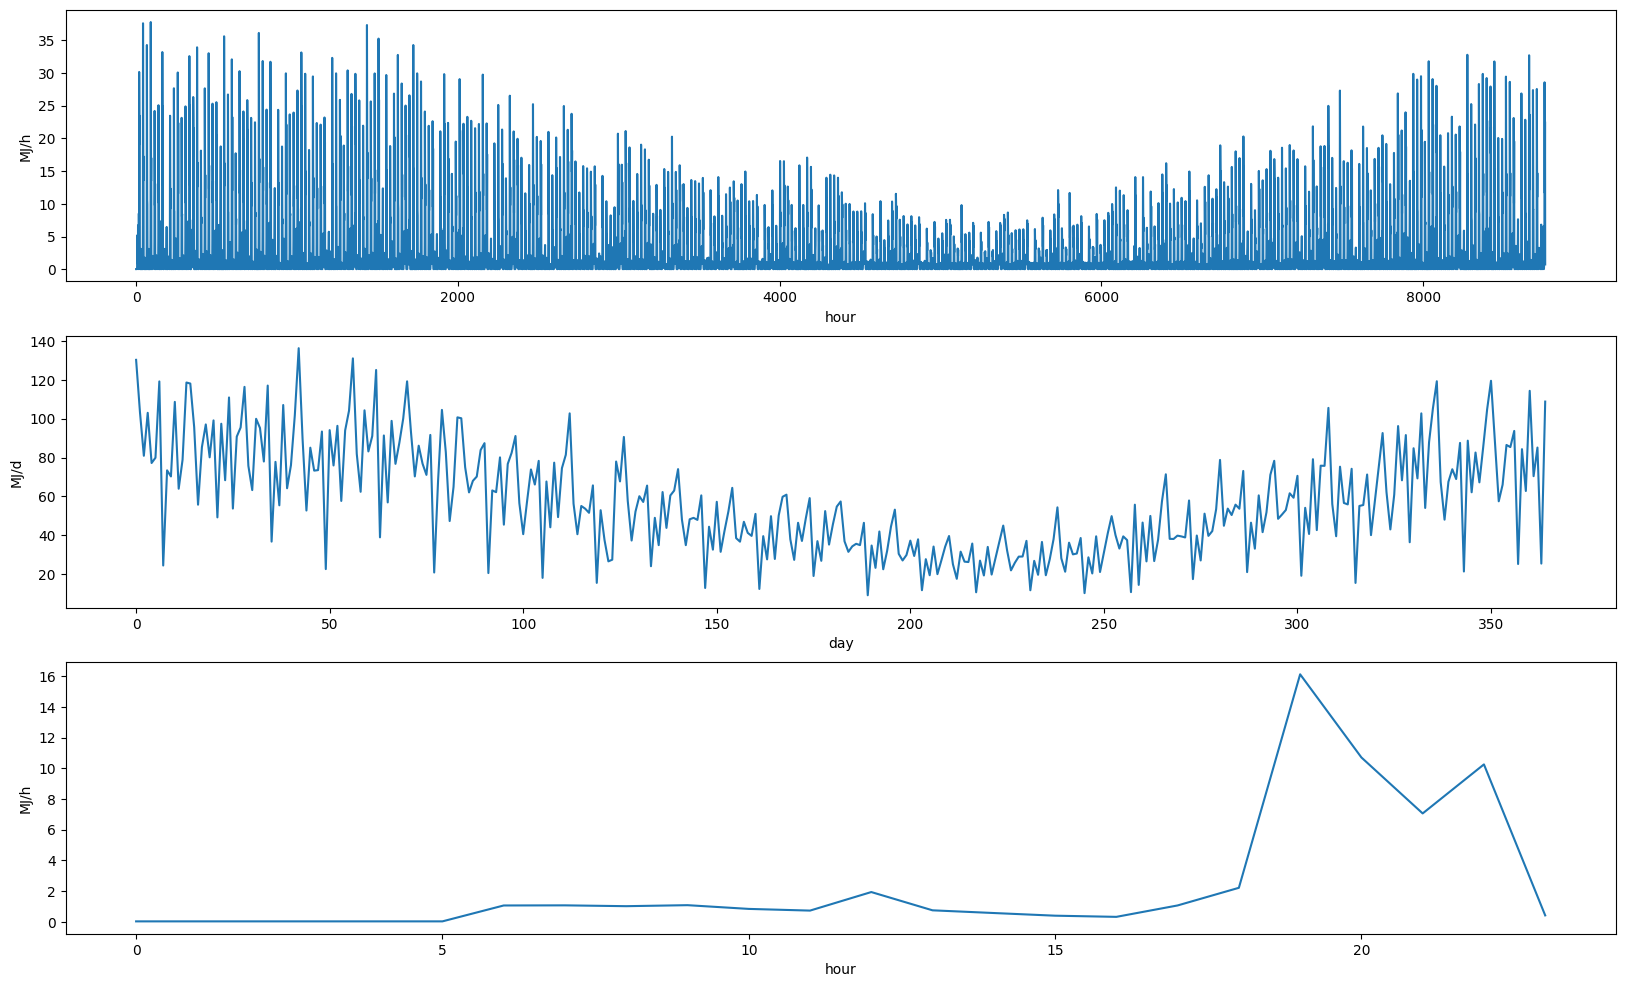

In [12]:
get_each_graph(E_W_d_t_4)

## 比較

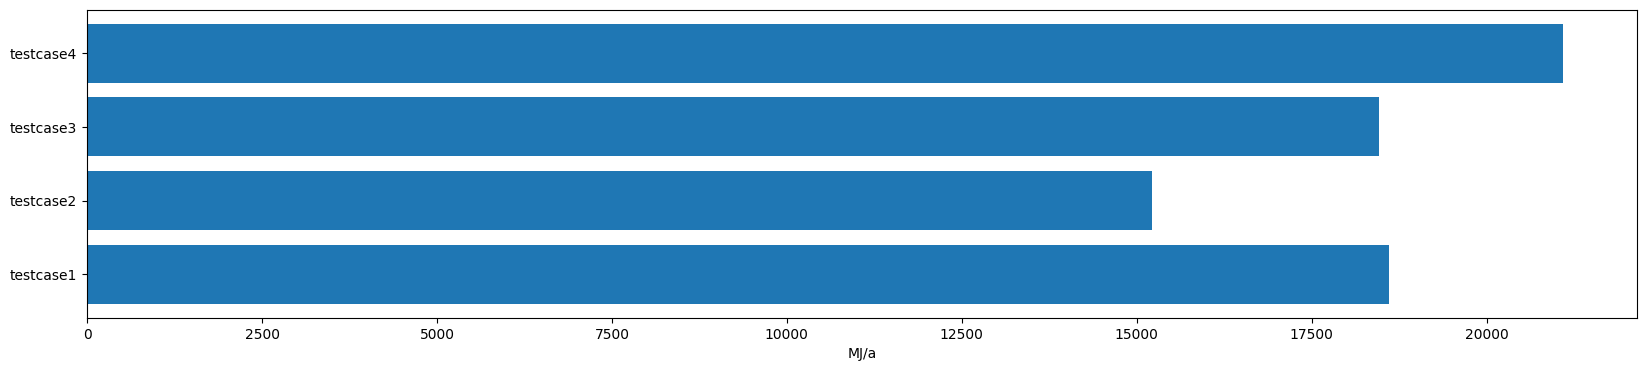

In [13]:
dat = {"testcase1":sum(E_W_d_t_1), "testcase2" : sum(E_W_d_t_2), "testcase3" : sum(E_W_d_t_3), "testcase4" : sum(E_W_d_t_4)}
xx = list(dat.keys())
yy = list(dat.values())

fig = plt.figure(figsize=(20,4))
axt = fig.add_subplot(111)
axt.barh(xx,yy)
axt.set_xlabel("MJ/a")
plt.show()
